<a href="https://colab.research.google.com/github/Alex-Chen1121/Deep-Leaning/blob/main/simpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 捲積:眼睛 負責過濾 cnn:大腦 負責判斷

from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()


In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
import pandas as pd
pd.DataFrame(y_test)

,0
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


In [ ]:
# 先看資料集有多大
print(x_train.shape)
# 50000, 32, 32, 3
# 五萬筆資料 32x32 rgb圖片
print(x_test.shape)
# 類別資料
print(y_train)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
trans=["飛機","汽車","鳥","貓","鹿","狗","青蛙","馬","船","卡車"]

In [ ]:
# 資料預處理
# 捲積處理不需要攤開圖片維度
# 將資料處理成0~1之間
import numpy as np
x_train_shape= x_train/255
y_train_shape= y_train/255
x_test_shape= x_test/255
y_test_shape= y_test/255

In [ ]:
print(x_train.shape)
print(x_train_shape.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


卡車


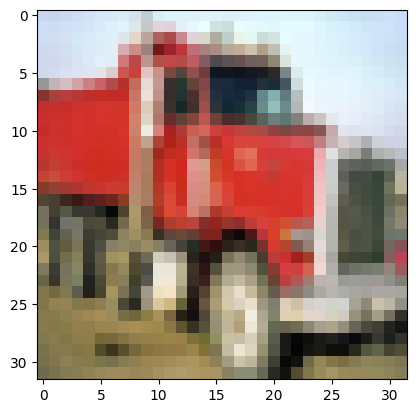

In [ ]:
import random
import matplotlib.pyplot as plt

c= random.randint(0, 49999)
# 關掉軸距
plt.axis=("off")
# 隨機秀出一筆資料
catagory= y_train[c][0]
print(trans[catagory])
plt.imshow(x_train[c])

In [ ]:
# demo 陣列可以直接做運算
b=np.array([2,2,4,8,12])
b/2

array([1., 1., 2., 4., 6.])

In [ ]:
# 因為輸出的是類別 所以要做轉換
from keras.utils.np_utils import to_categorical
y_train_cat= to_categorical(y_train)
y_test_cat= to_categorical(y_test)
print(y_train[1])
print(y_train_cat[1])

[9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 建立模型
from keras.models import Sequential
from keras.layers import Dense #全連接層
# conv 捲積(過濾器) pool 池化 flatten 攤平
from keras.layers import Conv2D, MaxPooling2D, Flatten

cnn= Sequential()

cnn.add(Conv2D(32, (3,3), input_shape= (32,32,3), padding="same", activation="relu"),)

# 池化--->減低計算量
cnn.add(MaxPooling2D(pool_size=(2,2)))

# vgg的概念 每一層的過濾器都是上一層的2倍
cnn.add(Conv2D(64, (3,3), padding="same", activation="relu"),)

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (3,3), padding="same", activation="relu"),)

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
# 輸入層
cnn.add(Dense(256, activation="relu"))
# 輸出層
cnn.add(Dense(10, activation="softmax"))
# review一下模型
cnn.summary()
# 參數量計算 filter "3x3" RGB "x3" 總共32個filter "x32" 每個激活都有bias "+32"

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [ ]:
# loss:輸出一個: binary crossentropy 輸出多個:catergorical crossentropy
cnn.compile(loss="categorical_crossentropy",
      metrics=["accuracy"],
      optimizer="adam"
      )

# 將資料餵進模型
# batch:看幾筆資料做一次梯度下降
# epochs:整份資料看幾次
# 1.訓練資料 2.答案 3.跑一次的資料量 4.跑整個資料幾次 5.驗證集 6.進度條 1有 2沒有
cnn.fit(x_train_shape,
    y_train_cat,
    batch_size=200,
    epochs=10,
    validation_split=0.1,
    verbose=1
        )



Epoch 1/10
225/225 [==============================] - 9s 15ms/step - loss: 1.5838 - accuracy: 0.4239 - val_loss: 1.2848 - val_accuracy: 0.5486
Epoch 2/10
225/225 [==============================] - 3s 13ms/step - loss: 1.1775 - accuracy: 0.5822 - val_loss: 1.0803 - val_accuracy: 0.6176
Epoch 3/10
225/225 [==============================] - 4s 16ms/step - loss: 0.9970 - accuracy: 0.6517 - val_loss: 0.9400 - val_accuracy: 0.6828
Epoch 4/10
225/225 [==============================] - 3s 15ms/step - loss: 0.8700 - accuracy: 0.6980 - val_loss: 0.8711 - val_accuracy: 0.6990
Epoch 5/10
225/225 [==============================] - 2s 9ms/step - loss: 0.7865 - accuracy: 0.7279 - val_loss: 0.8325 - val_accuracy: 0.7124
Epoch 6/10
225/225 [==============================] - 2s 11ms/step - loss: 0.7075 - accuracy: 0.7572 - val_loss: 0.7948 - val_accuracy: 0.7296
Epoch 7/10
225/225 [==============================] - 3s 12ms/step - loss: 0.6464 - accuracy: 0.7749 - val_loss: 0.7925 - val_accuracy: 0.7264


In [ ]:
# 評估模型準確度
cnn.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.7813 - accuracy: 0.7478


[0.7812920808792114, 0.7477999925613403]

In [ ]:
# 混淆矩陣 列出看看那些資料判斷錯誤
import pandas as pd
pre= cnn.predict(x_test_shape).argmax(axis=-1)

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))


313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,793,10,55,11,14,9,16,9,55,28
1,20,861,8,10,3,4,12,4,23,55
2,57,4,634,59,68,68,70,23,14,3
3,17,10,61,599,51,148,62,34,11,7
4,17,2,63,70,697,38,54,47,11,1
5,12,2,47,180,28,655,25,37,12,2
6,3,1,47,71,27,17,824,2,7,1
7,18,1,28,54,45,60,9,780,3,2
8,44,28,16,19,6,4,6,4,866,7
9,30,95,19,21,5,10,8,19,24,769


In [ ]:
print(y_test.shape)
print(pre.shape)
print(x_test_shape.shape)

(10000, 1)
(10000,)
(10000, 32, 32, 3)


In [ ]:
# 把y_test的維度拿掉
y_test.reshape(10000,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

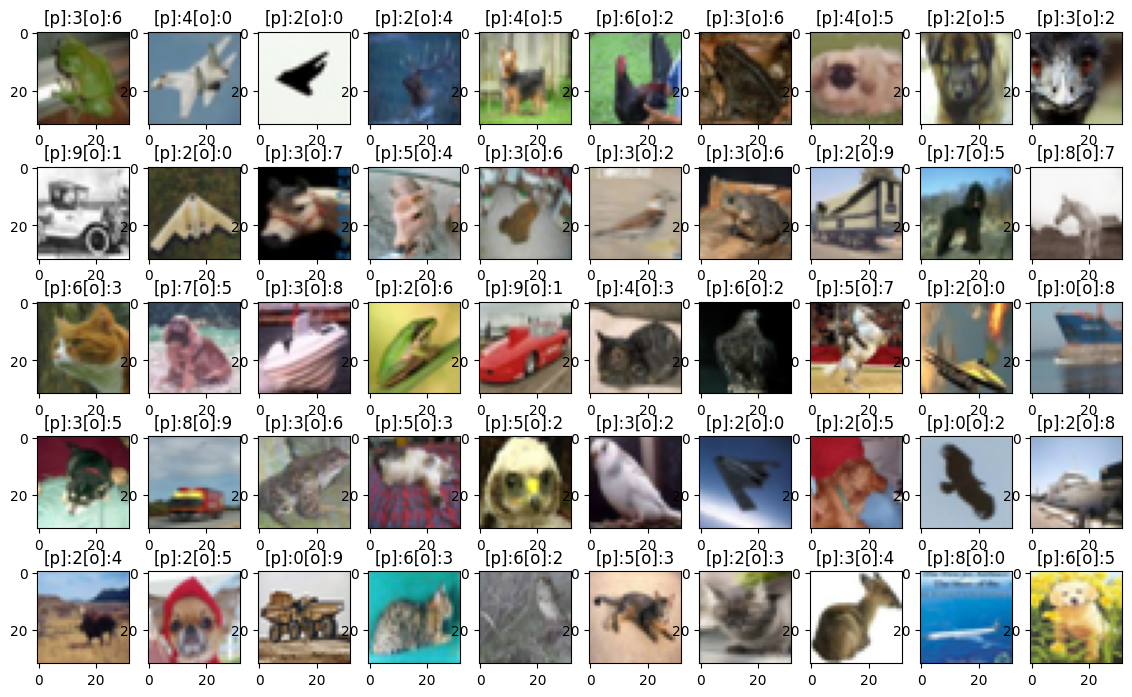

In [ ]:
import numpy as np

y_dim= y_test.reshape(10000)
# 只有numpy才能這樣做比較
# np.nonzero 把不是0的地方找出來
diff= np.nonzero(pre!=y_dim)[0]
orifalse= y_dim[diff]
prefalse= pre[diff]
imfalse= x_test[diff]
          # 寬度 高度
plt.figure(figsize=(14,450))
# 每一列放十個
width=10
height= int(len(imfalse)/10)+5

for (i,img) in enumerate(imfalse[0:50]):
  plt.subplot(height, width, i+1)
  plt.axis=(False)
  t= "[p]:"+str(prefalse[i])+"[o]:"+str(orifalse[i])
  plt.title(t)
  plt.imshow(img)
  # "1飛機","2汽車","3鳥","4貓","5鹿","6狗","7青蛙","8馬","9船","10卡車"